In [1]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import seaborn as sn

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import GridSearchCV

In [2]:
# Do not change the parameters.
RANDOM_STATE = 123
DATASET_NAME = 'mnist_784'
TEST_SIZE = 0.2

## Get Data

In [3]:
def get_data(display_details: bool = False) -> (np.ndarray, np.ndarray, np.ndarray, np.ndarray):
    """
        This method fetches the corresponding dataset and splits train and test sets. Also, it displays the details
        of the dataset.
        DO NOT CHANGE THE METHOD!
    :return: X_train, X_test, Y_train, Y_test as NumPy Array.
    """
    X, Y = fetch_openml(DATASET_NAME, version=1, return_X_y=True, as_frame=False)

    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=TEST_SIZE, shuffle=True,
                                                        random_state=RANDOM_STATE, stratify=Y)

    if display_details:
        print("Train Size:", X_train.shape[0], "\tTest Size:", X_test.shape[0])
        print("Feature Size:", X_train.shape[1])

        train_unique, train_count = np.unique(Y_train, return_counts=True)
        train_labels = {label: train_count[i] for i, label in enumerate(train_unique)}
        test_unique, test_count = np.unique(Y_test, return_counts=True)
        test_labels = {label: test_count[i] for i, label in enumerate(test_unique)}

        all_labels = sorted(list(train_labels.keys() | test_labels.keys()))

        print("\t\tClass Distribution:")
        for label in all_labels:
            print(f"Label: {label}\tTrain Set: {train_labels.get(label, 0)}\tTest Set: {test_labels.get(label, 0)}")

        plt.bar(train_labels.keys(), train_labels.values(), label="Train")
        plt.bar(test_labels.keys(), test_labels.values(), label="Test")
        plt.title("Class Distribution")
        plt.xticks(all_labels)
        plt.xlabel("Labels")
        plt.ylabel("Counts")
        plt.legend()
        plt.savefig("class_distribution.png")
        plt.show()
        plt.close()

    return X_train, X_test, Y_train, Y_test

Train Size: 56000 	Test Size: 14000
Feature Size: 784
		Class Distribution:
Label: 0	Train Set: 5522	Test Set: 1381
Label: 1	Train Set: 6302	Test Set: 1575
Label: 2	Train Set: 5592	Test Set: 1398
Label: 3	Train Set: 5713	Test Set: 1428
Label: 4	Train Set: 5459	Test Set: 1365
Label: 5	Train Set: 5050	Test Set: 1263
Label: 6	Train Set: 5501	Test Set: 1375
Label: 7	Train Set: 5834	Test Set: 1459
Label: 8	Train Set: 5460	Test Set: 1365
Label: 9	Train Set: 5567	Test Set: 1391


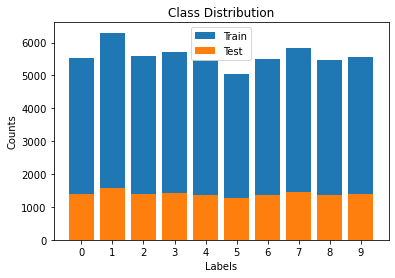

In [4]:
X_train, X_test, y_train, y_test = get_data(True)

In [5]:
all_labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

## Helper Functions

In [6]:
def report_metrics(y_true , y_pred, title):
    conf_mat = confusion_matrix(y_true , y_pred)
    precision, recall, fscore, support = score(y_true, y_pred, labels=all_labels)
    accuracy = conf_mat.diagonal()/conf_mat.sum(axis=1)
    accuracy = accuracy.round(5) * 100
    precision = precision.round(2)
    recall = recall.round(2)
    fscore = fscore.round(2)
    
    print("Total Accuracy:", accuracy_score(y_true, y_pred))
    print('accuracy: {}'.format(accuracy))
    print('avg accuracy: {}'.format(np.sum(accuracy)/accuracy.size))
    print('precision: {}'.format(precision))
    print('avg precision: {}'.format(np.sum(precision) / precision.size))
    print('recall: {}'.format(recall))
    print('avg recall: {}'.format(np.sum(recall) / recall.size))
    print('fscore: {}'.format(fscore))
    print('avg fscore: {}'.format(np.sum(fscore) / fscore.size))
    print('support: {}'.format(support))
    
    precision, recall, fscore, support = score(y_true, y_pred, labels=all_labels, average='weighted')
    
    print("weighted Total Accuracy:", accuracy_score(y_true, y_pred))
    print('weighted avg accuracy: {}'.format(np.sum(accuracy)/accuracy.size))
    print('weighted avg precision: {}'.format(np.sum(precision) / precision.size))
    print('weighted avg recall: {}'.format(np.sum(recall) / recall.size))
    print('weighted avg fscore: {}'.format(np.sum(fscore) / fscore.size))
    
    plt.figure(figsize=(16,9))
    sn.heatmap(conf_mat, annot=True, fmt='d')
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Truth')
    plt.savefig(f"results/{title}.png")

## Pre-Processing

In [7]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)

scaler = MinMaxScaler()
scaler.fit(X_test)
X_test = scaler.transform(X_test)

## KNN Model


 KNN with K=1 On the Training Set
Total Accuracy: 1.0
accuracy: [100. 100. 100. 100. 100. 100. 100. 100. 100. 100.]
avg accuracy: 100.0
precision: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
avg precision: 1.0
recall: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
avg recall: 1.0
fscore: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
avg fscore: 1.0
support: [5522 6302 5592 5713 5459 5050 5501 5834 5460 5567]
weighted Total Accuracy: 1.0
weighted avg accuracy: 100.0
weighted avg precision: 1.0
weighted avg recall: 1.0
weighted avg fscore: 1.0

 KNN with K=1 On the Test Set
Total Accuracy: 0.9722857142857143
accuracy: [98.986 99.302 97.496 96.218 95.751 96.516 99.2   97.67  95.238 95.543]
avg accuracy: 97.192
precision: [0.98 0.98 0.98 0.97 0.98 0.96 0.98 0.97 0.98 0.95]
avg precision: 0.9729999999999999
recall: [0.99 0.99 0.97 0.96 0.96 0.97 0.99 0.98 0.95 0.96]
avg recall: 0.9719999999999999
fscore: [0.99 0.99 0.98 0.97 0.97 0.96 0.98 0.97 0.97 0.95]
avg fscore: 0.9729999999999999
support: [1381 1575 1398 1428 1365 1263 1375

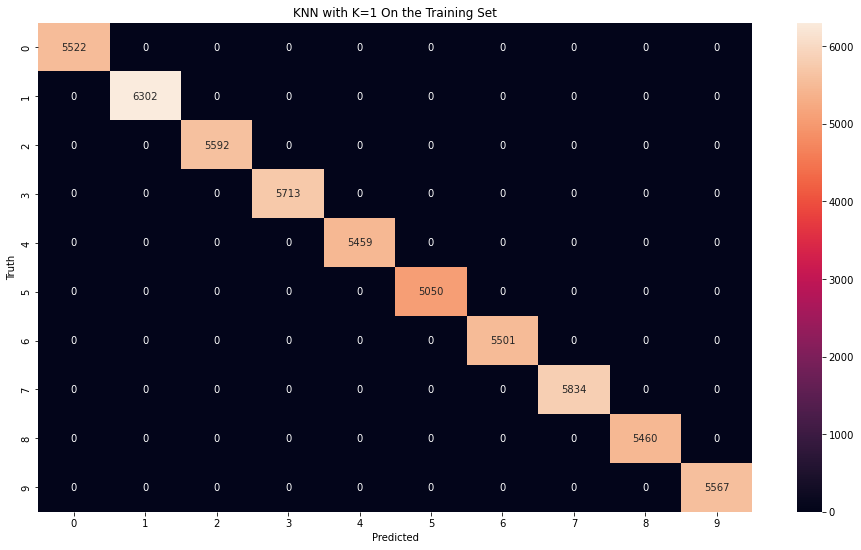

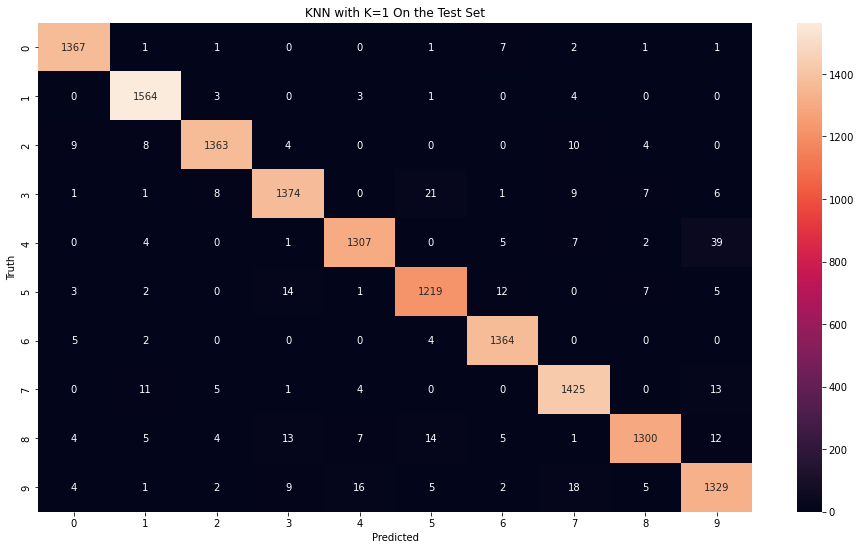

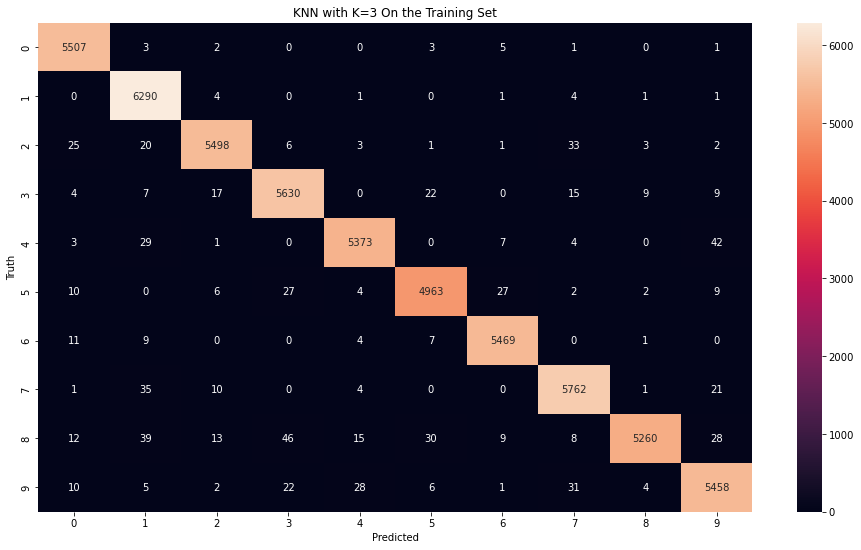

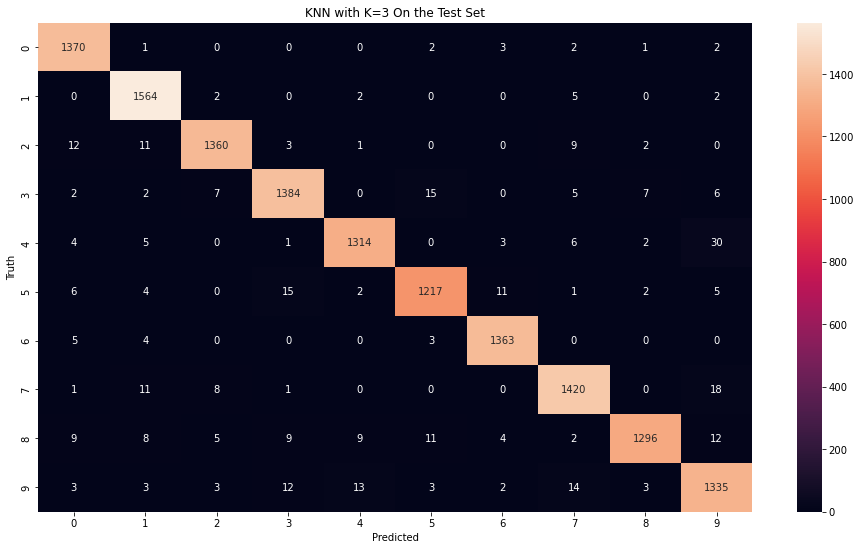

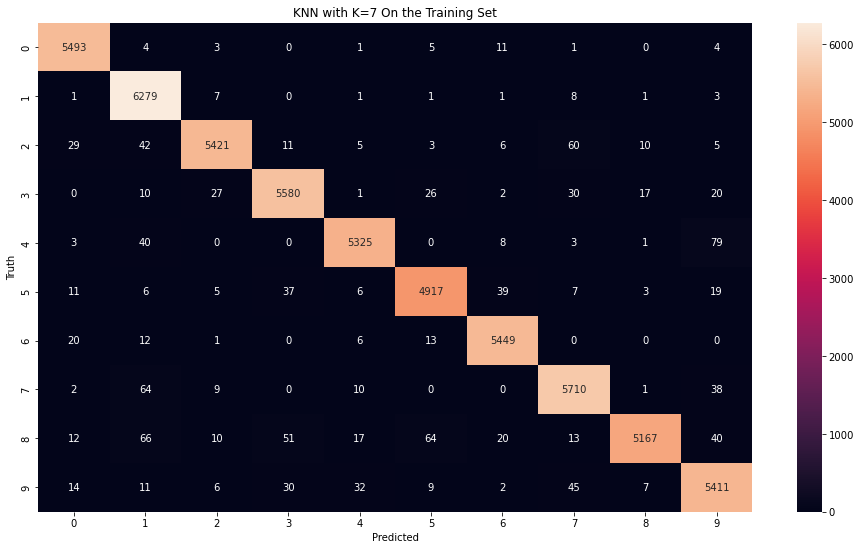

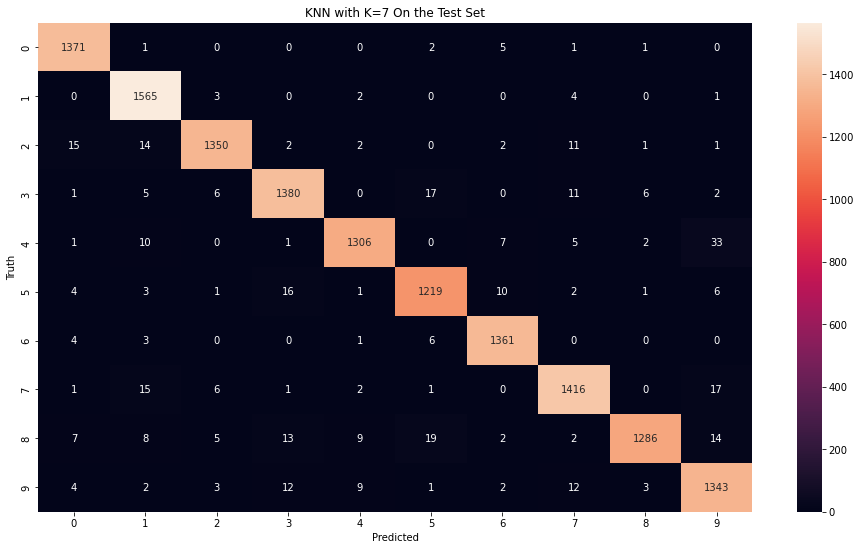

In [8]:
n_neighbors = [1, 3, 7]

for n in n_neighbors:
    knn_model = KNeighborsClassifier(n_neighbors=n, n_jobs=-1)
    knn_model.fit(X_train, y_train)
    
    y_pred_knn = knn_model.predict(X_train)
    title = "KNN with K=" + str(n) + " On the Training Set"
    print('\n', title)
    report_metrics(y_train, y_pred_knn, title)
    
    y_pred_knn = knn_model.predict(X_test)
    title = "KNN with K=" + str(n) + " On the Test Set"
    print('\n', title)
    report_metrics(y_test, y_pred_knn, title)


 KNN with K=1 and weights=distance On the Training Set
Total Accuracy: 1.0
accuracy: [100. 100. 100. 100. 100. 100. 100. 100. 100. 100.]
avg accuracy: 100.0
precision: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
avg precision: 1.0
recall: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
avg recall: 1.0
fscore: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
avg fscore: 1.0
support: [5522 6302 5592 5713 5459 5050 5501 5834 5460 5567]
weighted Total Accuracy: 1.0
weighted avg accuracy: 100.0
weighted avg precision: 1.0
weighted avg recall: 1.0
weighted avg fscore: 1.0

 KNN with K=1 and weights=distance On the Test Set
Total Accuracy: 0.9722857142857143
accuracy: [98.986 99.302 97.496 96.218 95.751 96.516 99.2   97.67  95.238 95.543]
avg accuracy: 97.192
precision: [0.98 0.98 0.98 0.97 0.98 0.96 0.98 0.97 0.98 0.95]
avg precision: 0.9729999999999999
recall: [0.99 0.99 0.97 0.96 0.96 0.97 0.99 0.98 0.95 0.96]
avg recall: 0.9719999999999999
fscore: [0.99 0.99 0.98 0.97 0.97 0.96 0.98 0.97 0.97 0.95]
avg fscore: 0.9729999999999999
su

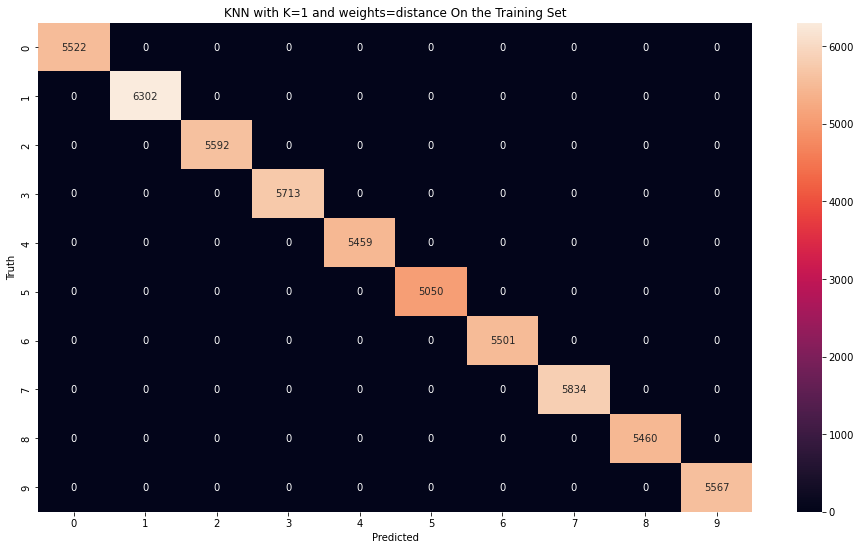

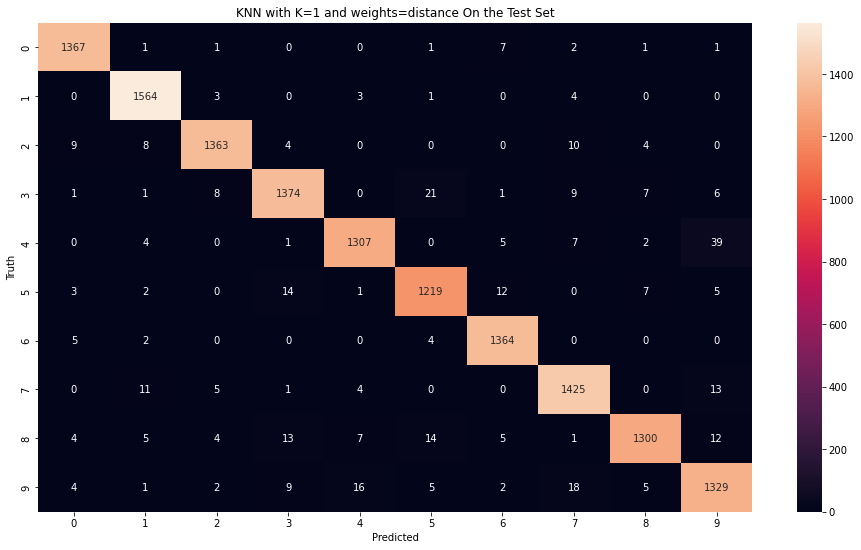

In [9]:
knn_model = KNeighborsClassifier(n_neighbors=1, n_jobs=-1, weights='distance')
knn_model.fit(X_train, y_train)

y_pred_knn = knn_model.predict(X_train)
title = "KNN with K=1 and weights=distance" + " On the Training Set"
print('\n', title)
report_metrics(y_train, y_pred_knn, title)

y_pred_knn = knn_model.predict(X_test)
title = "KNN with K=1 and weights=distance" + " On the Test Set"
print('\n', title)
report_metrics(y_test, y_pred_knn, title)

## Decision Tree


 Decision Tree with min_impurity_decrease=1e-07 On the Training Set
Total Accuracy: 1.0
accuracy: [100. 100. 100. 100. 100. 100. 100. 100. 100. 100.]
avg accuracy: 100.0
precision: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
avg precision: 1.0
recall: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
avg recall: 1.0
fscore: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
avg fscore: 1.0
support: [5522 6302 5592 5713 5459 5050 5501 5834 5460 5567]
weighted Total Accuracy: 1.0
weighted avg accuracy: 100.0
weighted avg precision: 1.0
weighted avg recall: 1.0
weighted avg fscore: 1.0

 Decision Tree with min_impurity_decrease=1e-07 On the Test Set
Total Accuracy: 0.8715714285714286
accuracy: [92.18  95.873 85.05  82.493 86.52  81.156 89.164 90.679 81.978 84.687]
avg accuracy: 86.978
precision: [0.92 0.94 0.87 0.85 0.86 0.82 0.89 0.91 0.8  0.84]
avg precision: 0.8700000000000001
recall: [0.92 0.96 0.85 0.82 0.87 0.81 0.89 0.91 0.82 0.85]
avg recall: 0.8700000000000001
fscore: [0.92 0.95 0.86 0.84 0.86 0.81 0.89 0.91 0.81 0.84]
avg fsc

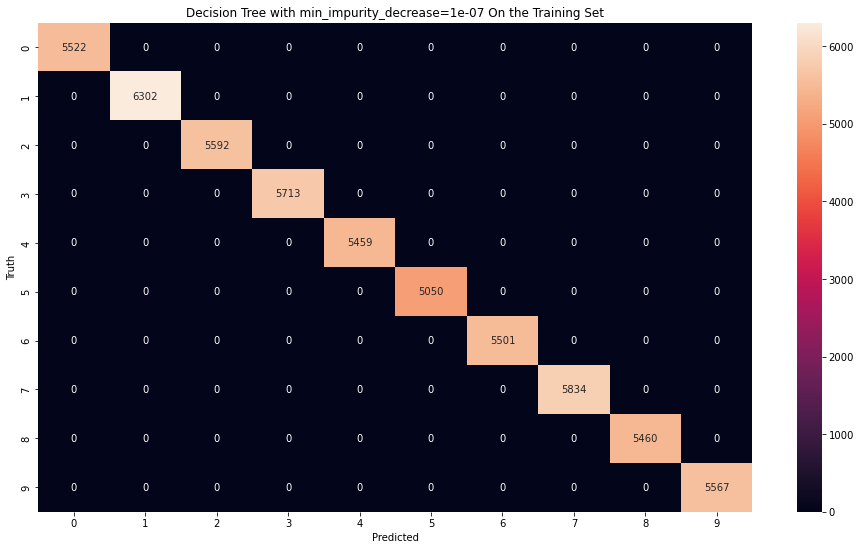

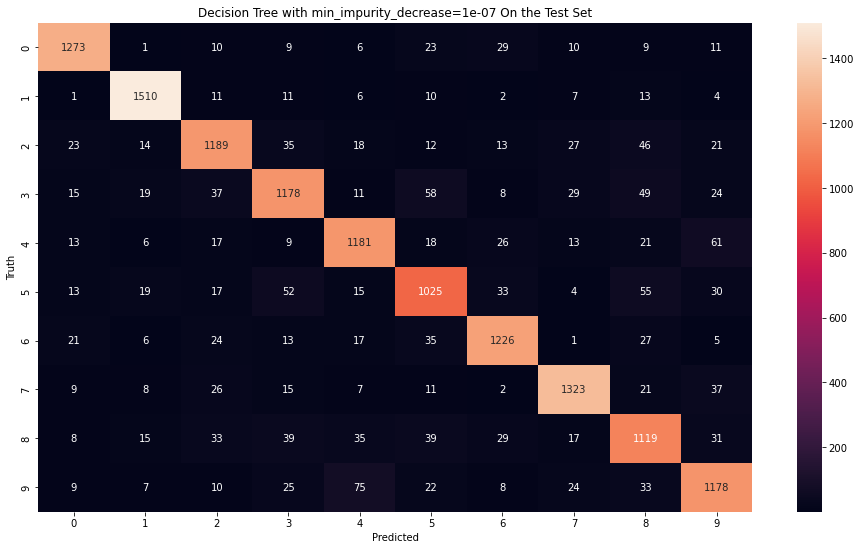

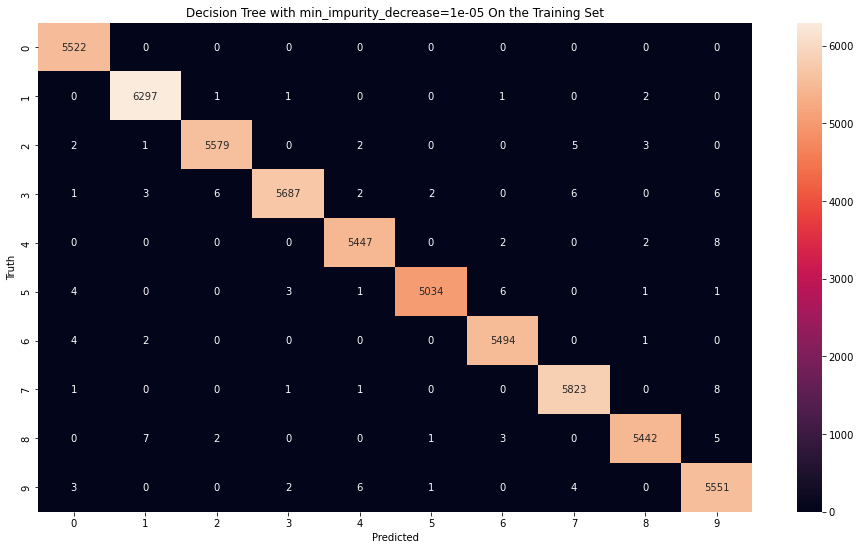

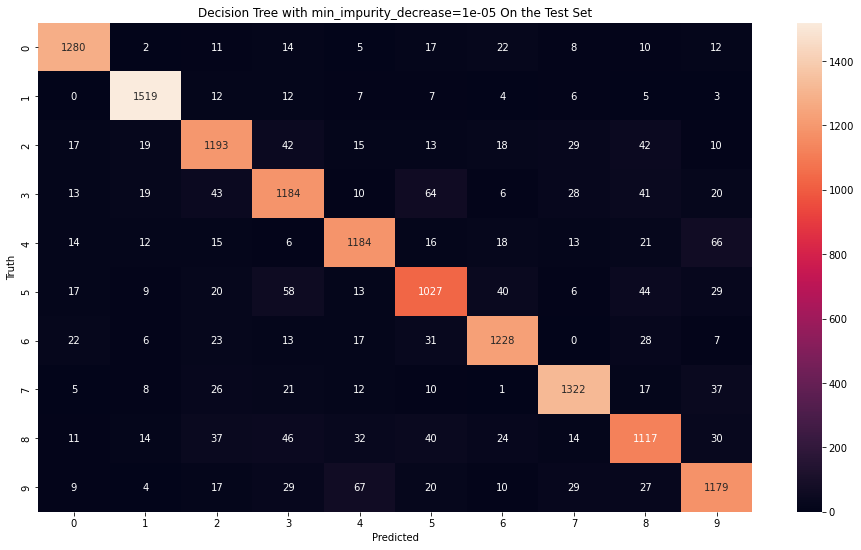

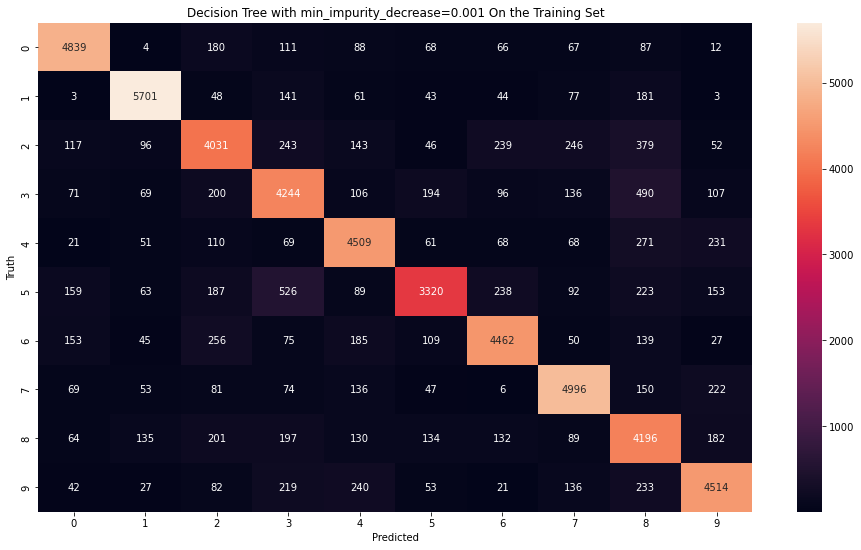

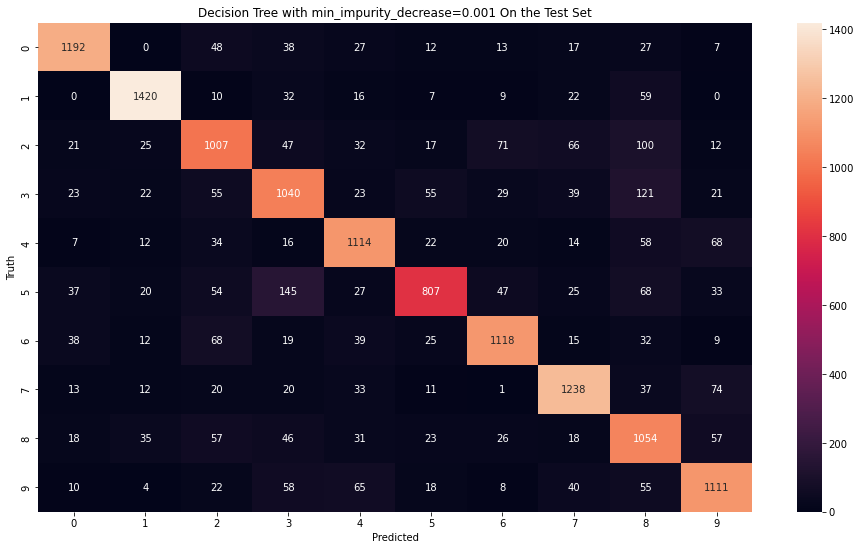

In [10]:
min_impurity_decreases = [1e-7, 1e-5, 1e-3]

for m in min_impurity_decreases:
    dtree_model = DecisionTreeClassifier(min_impurity_decrease=m)
    dtree_model.fit(X_train , y_train)
    
    y_pred_dtree = dtree_model.predict(X_train)
    title = "Decision Tree with min_impurity_decrease=" + str(m) + " On the Training Set"
    print('\n', title)
    report_metrics(y_train, y_pred_dtree, title)
    
    y_pred_dtree = dtree_model.predict(X_test)
    title = "Decision Tree with min_impurity_decrease=" + str(m) + " On the Test Set"
    print('\n', title)
    report_metrics(y_test, y_pred_dtree, title)


 Decision Tree with max depth=784 On the Training Set
Total Accuracy: 1.0
accuracy: [100. 100. 100. 100. 100. 100. 100. 100. 100. 100.]
avg accuracy: 100.0
precision: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
avg precision: 1.0
recall: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
avg recall: 1.0
fscore: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
avg fscore: 1.0
support: [5522 6302 5592 5713 5459 5050 5501 5834 5460 5567]
weighted Total Accuracy: 1.0
weighted avg accuracy: 100.0
weighted avg precision: 1.0
weighted avg recall: 1.0
weighted avg fscore: 1.0

 Decision Tree with max depth=784 On the Test Set
Total Accuracy: 0.8725
accuracy: [92.252 96.444 85.408 82.493 86.374 81.473 89.164 90.61  81.832 84.615]
avg accuracy: 87.06649999999999
precision: [0.92 0.94 0.85 0.84 0.88 0.83 0.9  0.9  0.82 0.84]
avg precision: 0.8720000000000001
recall: [0.92 0.96 0.85 0.82 0.86 0.81 0.89 0.91 0.82 0.85]
avg recall: 0.869
fscore: [0.92 0.95 0.85 0.83 0.87 0.82 0.89 0.9  0.82 0.84]
avg fscore: 0.869
support: [1381 1575 1398 1428 1

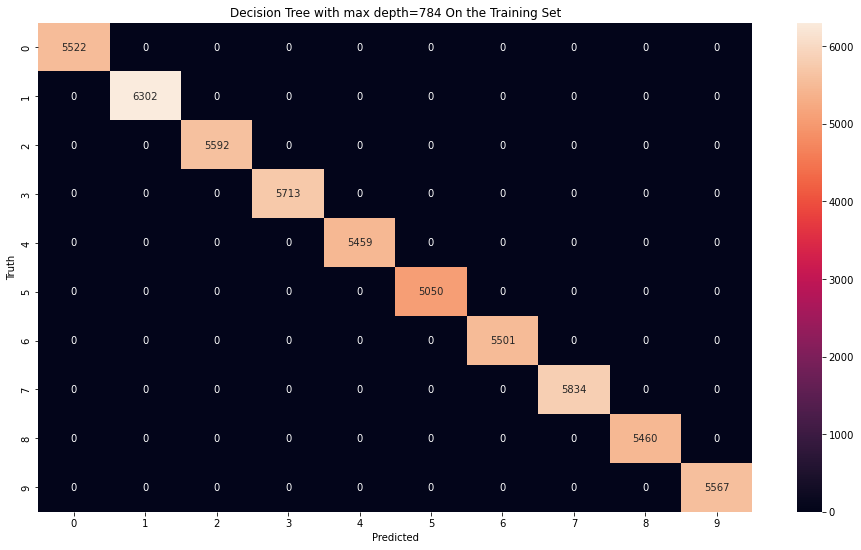

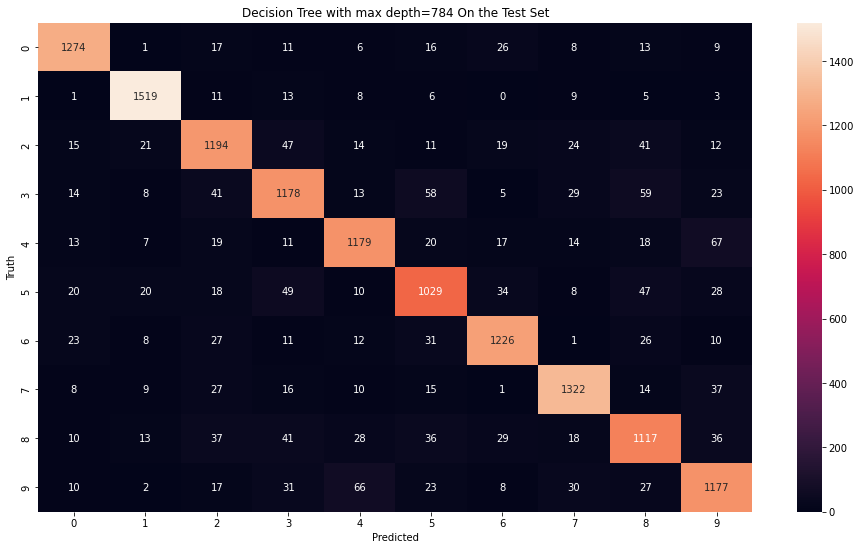

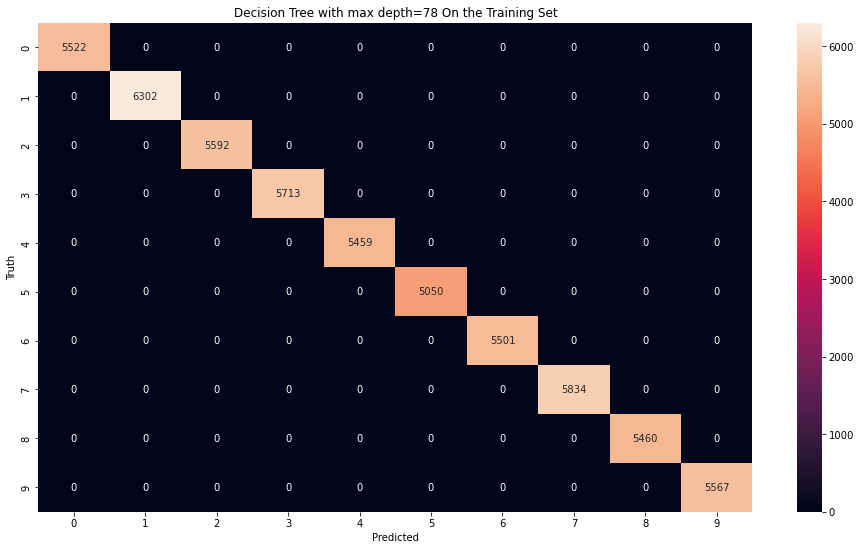

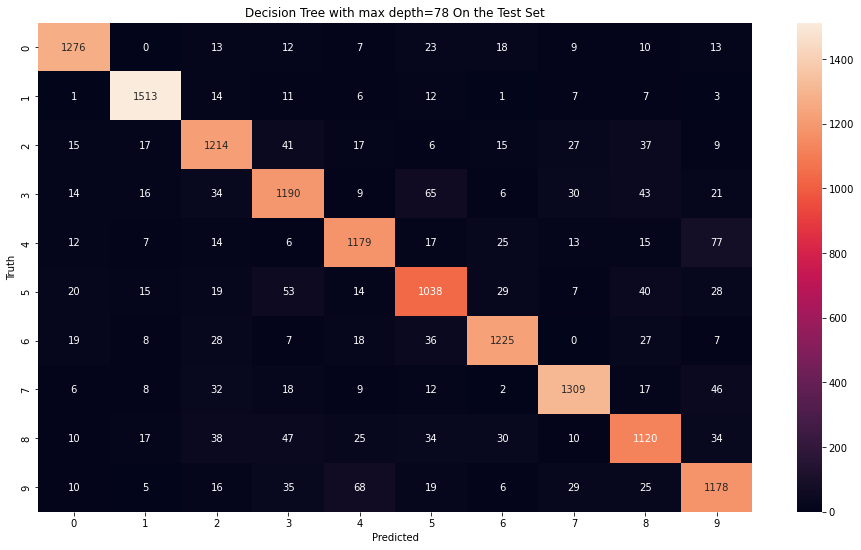

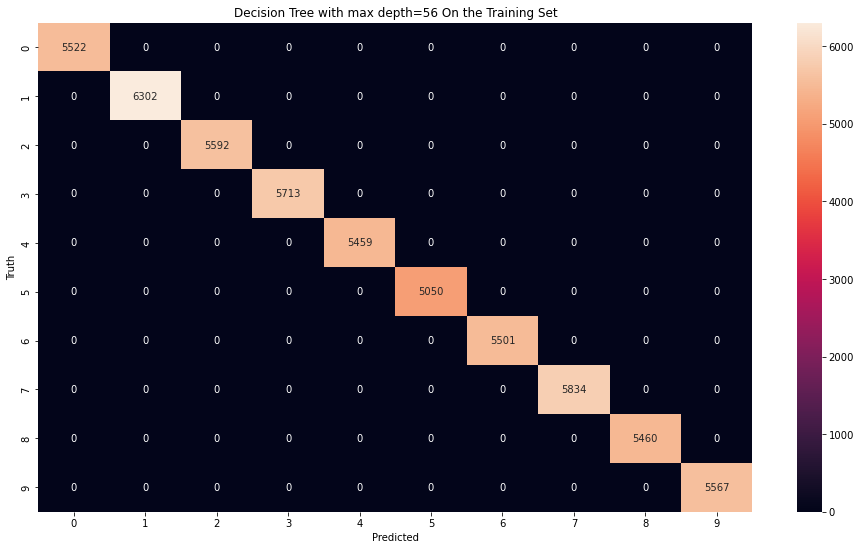

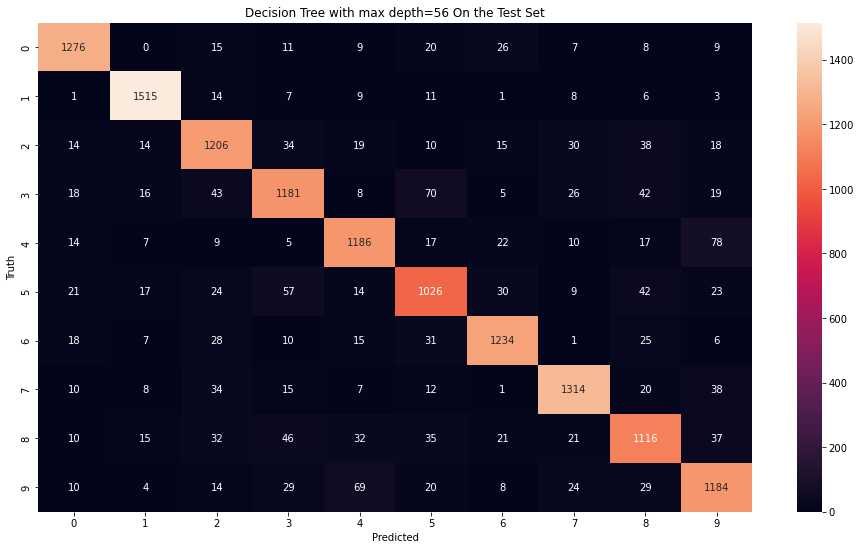

In [11]:
m_depths = [28*28, 28*28//10, 28*28//14]

for m in m_depths:
    dtree_model = DecisionTreeClassifier(min_impurity_decrease=1e-7, max_depth=m)
    dtree_model.fit(X_train , y_train)
    
    y_pred_dtree = dtree_model.predict(X_train)
    title = "Decision Tree with max depth=" + str(m) + " On the Training Set"
    print('\n', title)
    report_metrics(y_train, y_pred_dtree, title)
    
    y_pred_dtree = dtree_model.predict(X_test)
    title = "Decision Tree with max depth=" + str(m) + " On the Test Set"
    print('\n', title)
    report_metrics(y_test, y_pred_dtree, title)

## Random Forrest


 Random Forrest with number of trees=5 On the Training Set
Total Accuracy: 0.9938392857142857
accuracy: [99.819 99.889 99.481 99.3   99.432 99.168 99.491 99.28  98.938 98.958]
avg accuracy: 99.3756
precision: [0.99 0.99 0.99 0.99 0.99 0.99 1.   1.   0.99 0.99]
avg precision: 0.992
recall: [1.   1.   0.99 0.99 0.99 0.99 0.99 0.99 0.99 0.99]
avg recall: 0.992
fscore: [1.   1.   0.99 0.99 0.99 0.99 1.   0.99 0.99 0.99]
avg fscore: 0.993
support: [5522 6302 5592 5713 5459 5050 5501 5834 5460 5567]
weighted Total Accuracy: 0.9938392857142857
weighted avg accuracy: 99.3756
weighted avg precision: 0.9938432624517776
weighted avg recall: 0.9938392857142857
weighted avg fscore: 0.9938379276278454

 Random Forrest with number of trees=5 On the Test Set
Total Accuracy: 0.9233571428571429
accuracy: [97.972 98.222 93.491 89.426 92.747 88.599 94.909 91.844 86.886 88.21 ]
avg accuracy: 92.23060000000001
precision: [0.94 0.96 0.9  0.89 0.91 0.9  0.95 0.95 0.91 0.92]
avg precision: 0.923
recall: [0.98

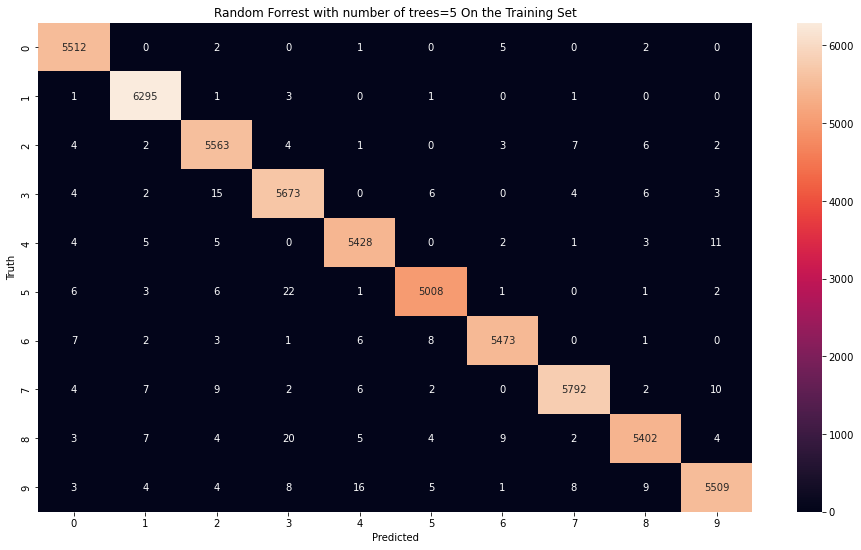

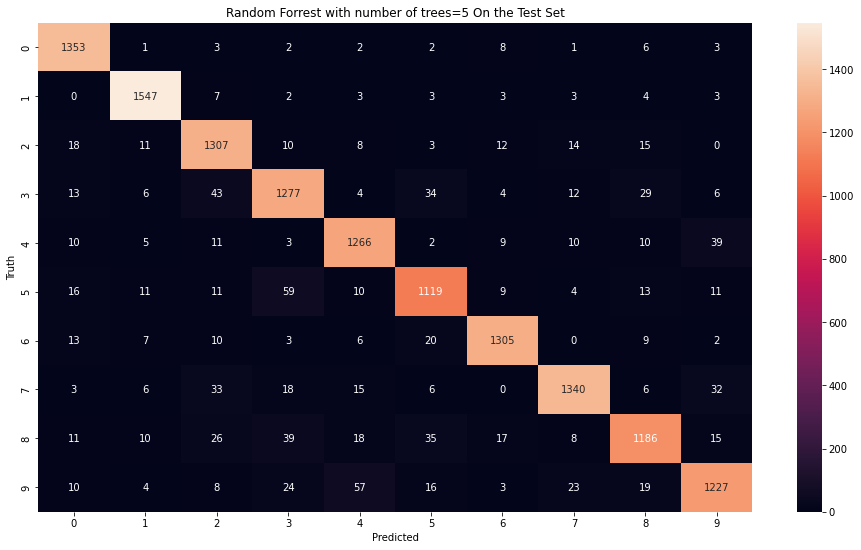

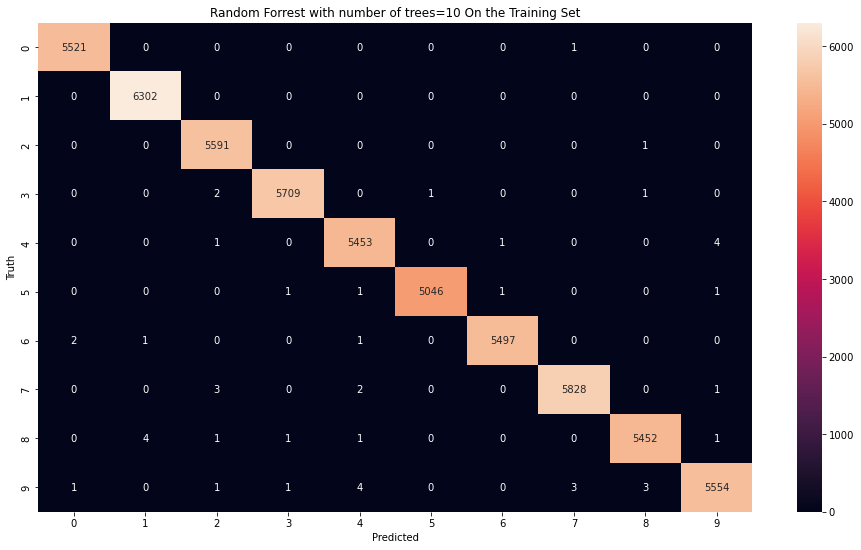

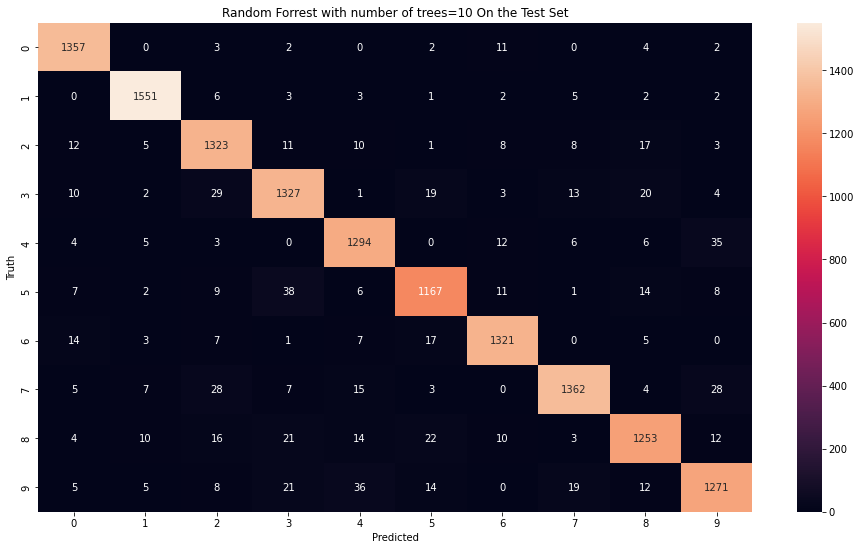

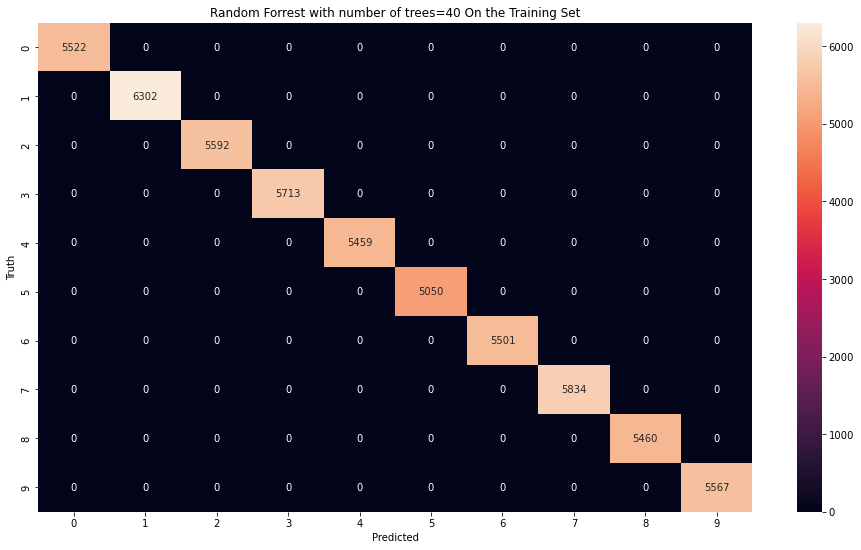

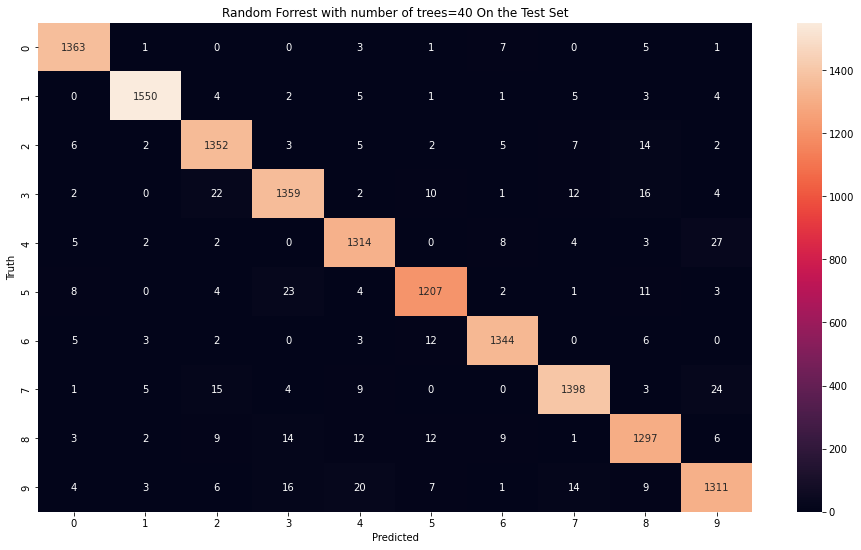

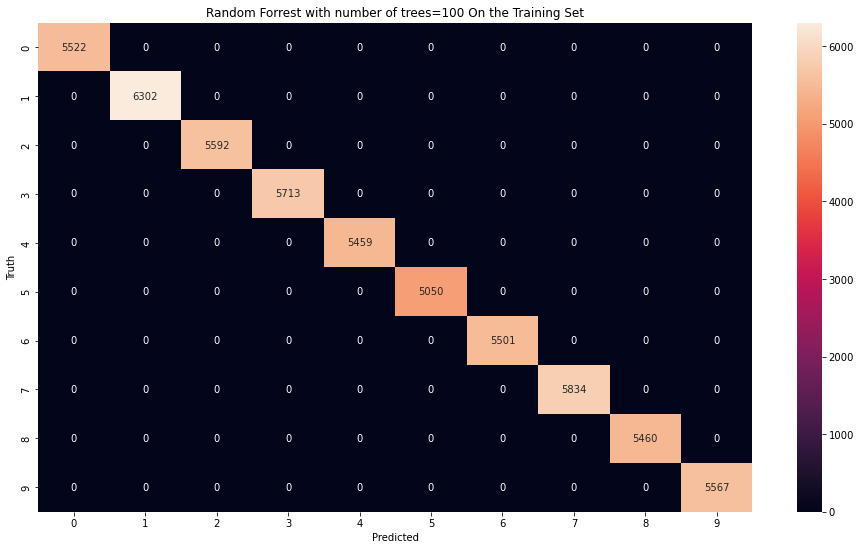

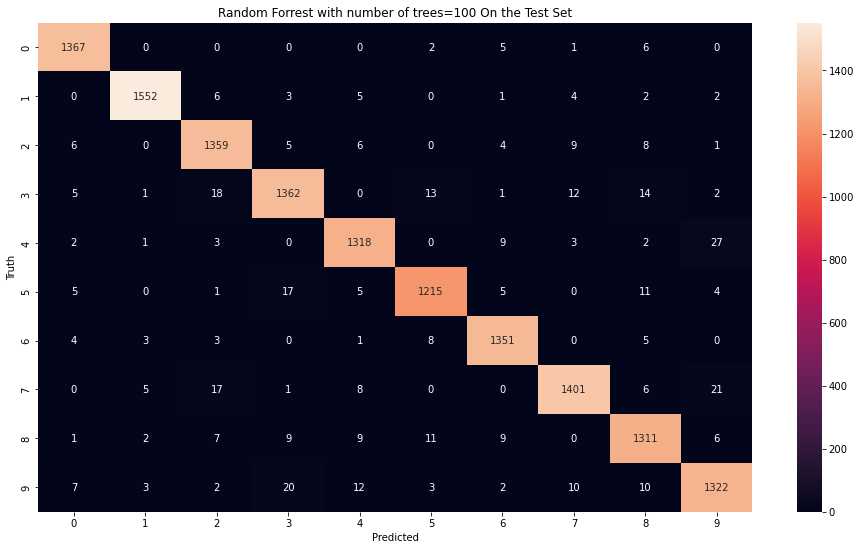

In [12]:
n_estimators = [5, 10, 40, 100]

for n in n_estimators:
    rforest_model = RandomForestClassifier(n_estimators=n)
    rforest_model.fit(X_train , y_train)
    
    y_pred_rforest = rforest_model.predict(X_train)
    title = "Random Forrest with number of trees=" + str(n) + " On the Training Set"
    print('\n', title)
    report_metrics(y_train, y_pred_rforest, title)
    
    y_pred_rforest = rforest_model.predict(X_test)
    title = "Random Forrest with number of trees=" + str(n) + " On the Test Set"
    print('\n', title)
    report_metrics(y_test, y_pred_rforest, title)

